In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy.stats
import randomfield

### Reproducing Fig.2 from Sánchez et. al Section 5

#### 1. Draw a galaxy type for each galaxy from the following distribution:

<center>$ p(t) \propto t^{a} \exp{-(t/t_{0})^{a}}$</center>

with $a=1.5, \, t_{0}=0.3$.

First, we'll write a function to define this distribution:

In [3]:
seed = 123
rng = np.random.RandomState(seed)

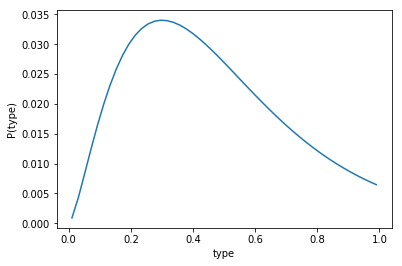

In [4]:
def prob_type(t, a, t0):
    '''Distribution for galaxy of type t.
    
    Parameters
    ----------
    t : int or array
        Galaxy type(s) to be sampled.
    a : Model parameter.
    t0 : Model parameter.
    
    Returns
    -------
    int or array
    Distribution of probabilities.
    '''
    
    num = t ** a
    den = np.exp(t / t0) ** a
    
    p = num / den
    norm = np.sum(p)
    
    return(p / norm)

a = 1.5
t0 = 0.3

#t_edge = np.linspace(0,1,200)
t_edge = np.linspace(0,1,50)
t_mid = 0.5 * (t_edge[1:] + t_edge[:-1])
p = prob_type(t_mid, a, t0)

plt.plot(t_mid, p)
plt.xlabel('type')
plt.ylabel('P(type)')
plt.show()

Next, we'll use inverse transform sampling to sample from an arbitrary distribution:

https://en.wikipedia.org/wiki/Inverse_transform_sampling

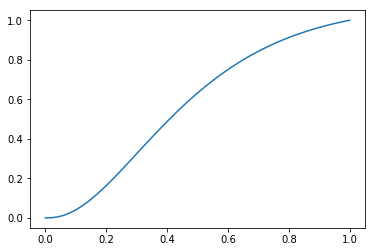

In [5]:
P = np.zeros_like(t_edge)
P[1:] = np.cumsum(p)
P /= P[-1] 

plt.plot(t_edge, P)
plt.show()

In [7]:
rng.randint(0,51, size=10) / 50

array([0.9 , 0.04, 0.56, 0.68, 0.76, 0.34, 0.38, 0.84, 0.44, 0.66])

In [9]:
r = rng.uniform(size=10000)
t = np.interp(r, P, t_edge)

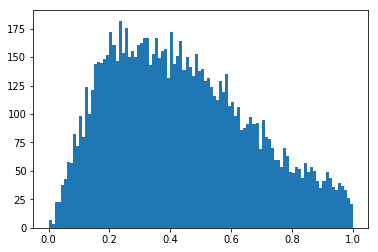

In [9]:
plt.hist(t, bins=100, range=(0,1))
plt.show()

In [10]:
rndm = rng.uniform(size=10000)
idx = [(np.abs(r - ii)).argmin() for ii in rndm]

In [13]:
np.abs(r - rndm[0]).argmin()

9430

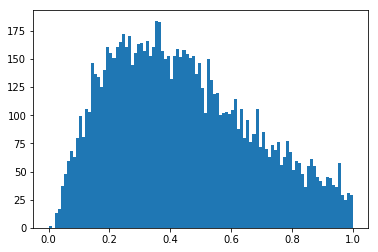

In [10]:
## How to sample t - should give back distribution above
rndm = rng.uniform(size=10000)
idx = [(np.abs(r - ii)).argmin() for ii in rndm]
plt.hist(t[idx], bins=100, range=(0,1))
plt.show()

In [18]:
u = rng.randint(0,51, size=10000) / 50
t = np.interp(u, P, t_edge)

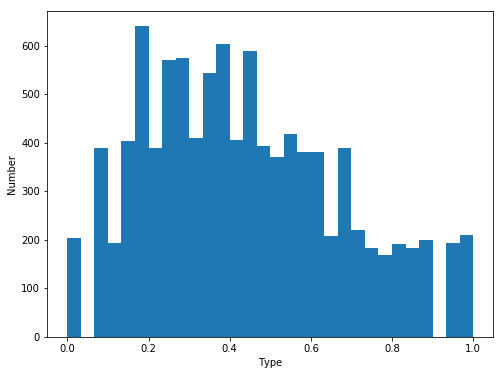

In [37]:
plt.figure(figsize=(8,6))
plt.hist(t, bins=30)
plt.xlabel('Type')
plt.ylabel('Number')
plt.show()

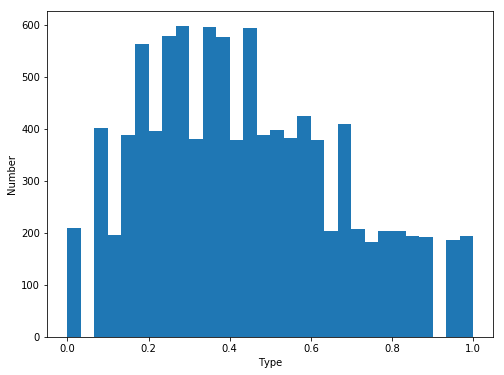

In [81]:
def sample_type(uniform_dist, type_dist, size):
    #rndm = rng.uniform(size=1)
    rndm = rng.randint(0,51, size=size) / 50
    idx = [(np.abs(uniform_dist - rndm[ii])).argmin() for ii in range(size)]
    return(type_dist[idx])

plt.figure(figsize=(8,6))
plt.hist(sample_type(u, t, 10000), bins=30)
plt.xlabel('Type')
plt.ylabel('Number')
plt.show()

In [21]:
sampled_types = sample_type(u, t, 10000)

#### 2. Assign redshifts based on type

In [29]:
def assign_redshifts(t):
        
    z = np.ones_like(t)
    
    for ii, tt in enumerate(t):
        rnd = rng.uniform(0,1)
        if tt == 0:
            if rnd >= 0.2:
                z[ii] = tt
            else:
                z[ii] = tt + 0.02
        if tt == 1:
            if rnd >= 0.2:
                z[ii] = tt
            else:
                z[ii] = tt - 0.02
        else:
            if rnd >= 0.4:
                z[ii] = tt
            if (rnd >= 0.2) or (rnd <0.4):
                z[ii] = tt + 0.02
            else:
                z[ii] = tt - 0.02
        
    return(z)

In [30]:
z = assign_redshifts(sampled_types)

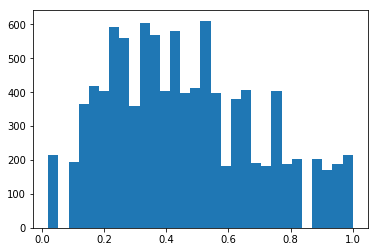

In [32]:
plt.hist(z, bins=30)
plt.show()

#### 3. Define a Gaussian likelihood for the flux given type

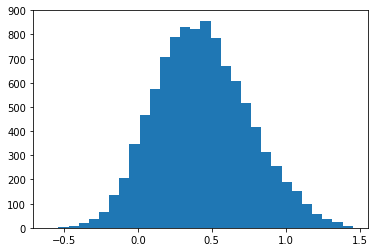

In [49]:
def flux_likelihood(t, sig_F=0.2):
    return(rng.normal(loc=t, scale=sig_F))

fluxes = flux_likelihood(t)

plt.hist(fluxes, bins=30)
plt.show()

#### 4. Draw a position based on each galaxy redshift
<center>$ p(\theta | z) \propto (1 + \delta (\theta, z))$</center>


In [51]:
generator = randomfield.Generator(1024, 1024, 2, grid_spacing_Mpc_h=1.0, verbose=True)
delta = generator.generate_delta_field(smoothing_length_Mpc_h=2.0, seed=seed, show_plot=True)

ValueError: Last dimension of packed array must be odd.

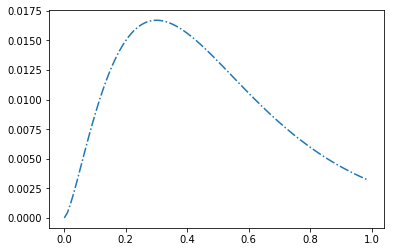

In [4]:
a = 1.5
t0 = 0.3

types = np.arange(0, 1, .01)
plt.plot(types, prob_type(types, a, t0), '-.')
plt.show()

In [5]:
def empirical_cdf(x, xlo, xhi):
    """Tabulate the empirical CDF from samples of an arbitrary random variable.
    
    Parameters
    ----------
    x : array of shape (N,)
        Array of input random variable values to use.
    xlo : float
        Low limit for the random variable x.
    xhi : float
        High limit for the random variable x.
        
    Returns
    -------
    tuple
        Tuple (x_cdf, y_cdf) of arrays both of shape (N+2,), padded at each end
        as described above.
    """
    assert xlo < xhi
    x = np.asarray(x)
    assert np.all((x >= xlo) & (x <= xhi))
    # YOUR CODE HERE
    
    N = len(x)
    
    xcdf = np.empty(N+2)
    ycdf = np.empty(N+2)
    
    xcdf[0] = xlo
    xcdf[-1] = xhi
    xcdf[1:-1] = np.sort(x)
    
    ycdf[0] = 0
    ycdf[-1] = 1
    
    for i in (np.arange(1, N+1)):
        ycdf[i] = i / (N + 1)
    
    return(xcdf, ycdf)
    
    raise NotImplementedError()

In [8]:
np.cumsum([1,2,3])

array([1, 3, 6])

In [ ]:
# How to sample from p(z|t): inverse transform sampling

In [9]:
r = np.random.uniform(size=10000)
t = np.interp(r, P, t_edge)

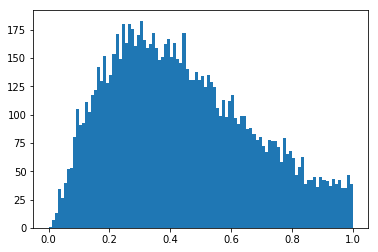

In [11]:
plt.hist(t, bins=100, range=(0,1))
plt.show()

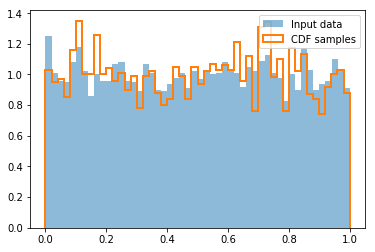

In [6]:
N = 5000
gen = np.random.RandomState(seed=123)
x_in = gen.uniform(0, 1, size=N)
plt.hist(x_in, bins=50, label='Input data', alpha=0.5, normed=True)
x_cdf, y_cdf = empirical_cdf(x_in, 0., 1.)
y = gen.uniform(size=N)
x = np.interp(y, y_cdf, x_cdf)
plt.hist(x, bins=50, label='CDF samples', histtype='step', lw=2, normed=True)
plt.legend()

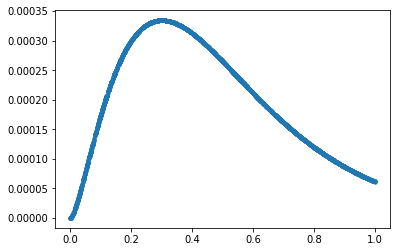

In [7]:
# How do we know which x_in to use? Aren't we just getting the same thing back?

plt.plot(x, prob_type(x, a, t0), '.')
plt.show()

In [8]:
def assign_redshifts(t):
    
    # generate rng with a seed for the whole notebook
    
    z = np.ones_like(t)
    
    for ii, tt in enumerate(t):
        if tt == 0:
            rnd = np.random.uniform(0,1)
            if rnd >= 0.2:
                z[ii] = tt
            else:
                z[ii] = tt + 0.02
        if tt == 1:
            rnd = np.random.uniform(0,1)
            if rnd >= 0.2:
                z[ii] = tt
            else:
                z[ii] = tt - 0.02
        else:
            rnd = np.random.uniform(0,1)
            if rnd >= 0.4:
                z[ii] = tt
            if (rnd >= 0.2) or (rnd <0.4):
                z[ii] = tt + 0.02
            else:
                z[ii] = tt - 0.02
        
    return(z)

In [ ]:
sigmaF = 0.1
F = np.random.normal(loc=t, scale=sigmaF)

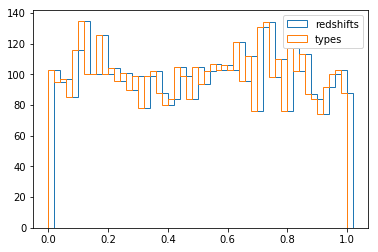

In [9]:
plt.hist(assign_redshifts(x), histtype='step', bins=50, label='redshifts')
plt.hist(x, histtype='step', bins=50, label='types')
plt.legend()
plt.show()

#### Generate a Gaussian Random Field (GRF):

- For each redshift bin (or slice) we generate δz from a Gaussian Random Field (GRF) with a resolution of 1024x1024 pixels that we will use to define galaxy positions in a way to simulate galaxy clustering.

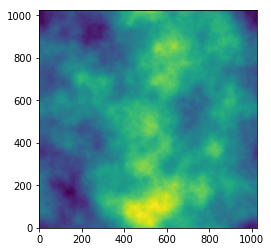

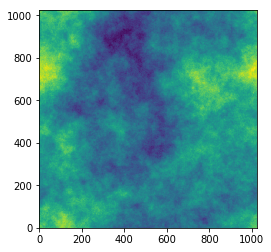

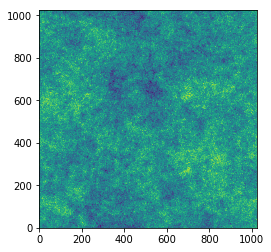

In [52]:
def fftIndgen(n):
    a = range(0, int(n/2)+1)
    b = range(1, int(n/2))
    b = reversed(b)
    a = [i for i in a]
    b = [-i for i in b]
    return a + b

def gaussian_random_field(Pk = lambda k : k**-3.0, size = 100):
    def Pk2(kx, ky):
        if kx == 0 and ky == 0:
            return 0.0
        return np.sqrt(Pk(np.sqrt(kx**2 + ky**2)))
    noise = np.fft.fft2(np.random.normal(size = (size, size)))
    amplitude = np.zeros((size,size))
    for i, kx in enumerate(fftIndgen(size)):
        for j, ky in enumerate(fftIndgen(size)):            
            amplitude[i, j] = Pk2(kx, ky)
    return np.fft.ifft2(noise * amplitude)

for alpha in [-4.0, -3.0, -2.0]:
    out = gaussian_random_field(Pk = lambda k: k**alpha, size=1024)
    plt.figure()
    plt.imshow(out.real, interpolation='none', origin='lower')

In [85]:
np.std(out.real)

0.0063723818931738221

In [65]:
delta = out.real.flatten()/np.std(out.real) * 2.5

In [83]:
np.std(delta[:,:,0])

0.0031115492673670178

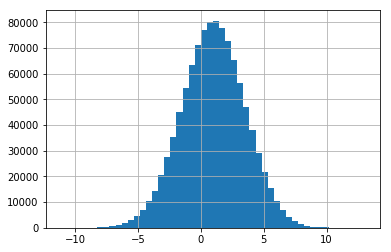

In [66]:
plt.hist(delta + 1, bins=50)
plt.grid()
plt.show()

In [67]:
rho = np.maximum(0, delta + 1)

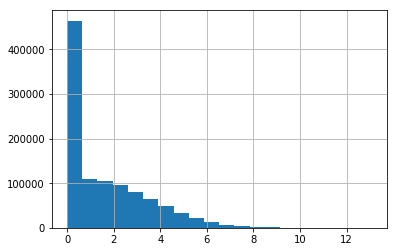

In [70]:
plt.hist(rho, bins=20)
plt.grid()
plt.show()

In [74]:
delta = np.empty((1024,1024,50))
alpha = -3.0

for i in range(50):
    delta[:,:,i] = gaussian_random_field(Pk = lambda k: k**alpha, size=1024).real

In [75]:
rho = np.maximum(0, 1 + delta)

In [80]:
iz = np.digitize(z, 50)d

ValueError: object of too small depth for desired array

The power spectrum determines the amplitude of the fluctuations. So we generate noise, amplitudes (from 2-dimensional power spectrum) in k-space, then inverse FT (noise x amplitudes) back to real space to get fluctuations.

This is for x and y which represent our sky coordinate vector theta.

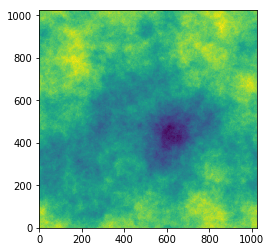

In [54]:
alpha = -3.0
out = gaussian_random_field(Pk = lambda k: k**alpha, size=1024)
plt.figure()
plt.imshow(out.real, interpolation='none', origin='lower')